# PathPlanning::LIAN

## Lian Breaking Ties Test. 
##### Testing speed, path length and memory difference between Lian implementstion with BreakingTies and without

In some grid maps there are many equal-length paths. A\* might explore all the paths with the same $f = g(s) + h(s, s_{goal})$ value, instead of only one.

So in some cases we will need some rules to deal with tie situations - tie breaker. The tie breaker that was choosen in current situation is an algorithm that chooses more important part of $f$ value: $g$ or $h$. 

So, to situations are called: _"g-max"_ and _"g-min"_.

* _"g-max"_: we compare $f$ value for both vertices $(s_1, s_2)$ and if $f(s_1) == f(s_2)$ compare their $g$ values and choose vertex with ___greater___ $g$ value.

* _"g-min"_: we compare $f$ value for both vertices $(s_1, s_2)$ and if $f(s_1) == f(s_2)$ compare their $g$ values and choose vertex with ___lesser___ $g$ value.

## Experiment

Below there are results for comparison between LIAN algorithm without tie breaker (LIAN) and with tie breaker equals _"g-max"_(LIAN-bt). For this test were used:
* Moscow Maps 2.0
* Following profiles:
    + anglelimit=20, distance=10, weight=2
    + anglelimit=25, distance=10, weight=2
    + anglelimit=30, distance=10, weight=2
    

In [1]:
import pandas as pd
import numpy as np

test = pd.read_excel('data/LianBTvsLian.xlsx', header=1, skip_footer=16)
test.head()

,Search,Tag,Moscow Maps 2.0
0,LianSearch weight=2 steplimit=-1 anglelimit=20...,numberofsteps,17335.804882
1,LianSearch weight=2 steplimit=-1 anglelimit=20...,memory,20672.300740
2,LianSearch weight=2 steplimit=-1 anglelimit=20...,pathlength,517.307222
3,LianSearch weight=2 steplimit=-1 anglelimit=20...,time,0.253251
4,LianSearch weight=2 steplimit=-1 anglelimit=20...,sections,50.679430


In [2]:
time = test.loc[test['Tag'] == 'time']
numberofsteps = test.loc[test['Tag'] == 'numberofsteps']
length = test.loc[test['Tag'] == 'pathlength']
memory = test.loc[test['Tag'] == 'memory']
sections = test.loc[test['Tag'] == 'sections']

### Time Difference

Let's look at the time difference between this two implementations of Lian Search:

In [3]:
av_time_bt = time['Moscow Maps 2.0 '].loc[time['Search'].str.contains('2017-11-27', case=False)].sum() / len(time) / 2
av_time = time['Moscow Maps 2.0 '].loc[time['Search'].str.contains('2017-11-22', case=False)].sum() / len(time) / 2
print ('Time for Moscow Maps:\nLIAN:', av_time)
print ('LIAN with breaking ties:', av_time_bt)
print ('Percentage difference:', av_time_bt * 100 / av_time)
print ('Lian without BT:', int(av_time_bt * 100 / av_time) - 100, '% faster')

Time for Moscow Maps:
LIAN: 0.0594771178306
LIAN with breaking ties: 0.0732265944869
Percentage difference: 123.11725443
Lian without BT: 23 % faster


As we can see, even this simple tie breaker can seriously slow down our algorithm. Lian expands a lot of vertices, as it has different states for each cell on grid. Even if we add two simple comparisons, the number of them will be so great, that algorithm with tie breaker will be $23\%$ slower.

### Memory Difference

Let's look at the memory difference:

In [4]:
av_mem_bt = memory['Moscow Maps 2.0 '].loc[memory['Search'].str.contains('2017-11-27', case=False)].sum() / len(memory) / 2
av_mem = memory['Moscow Maps 2.0 '].loc[memory['Search'].str.contains('2017-11-22', case=False)].sum() / len(memory) / 2
print ('Memory for Moscow Maps:\nLIAN:', av_mem)
print ('LIAN with breaking ties:', av_mem_bt)
print ('Percentage difference:', av_mem_bt * 100 / av_mem)
print ('Lian without BT:', int(round(av_mem_bt * 100 / av_mem)) - 100, '% lighter')

Memory for Moscow Maps:
LIAN: 3867.30837542
LIAN with breaking ties: 3905.56914228
Percentage difference: 100.989338402
Lian without BT: 1 % lighter


The number of created nodes is not equal either. But the difference is less significant (only $1\%$). 

In colclusion, in current situation tie breaker _"g-max"_ do not improve memory situation.

### Path Length Difference

Let's look at the path length difference:

In [5]:
av_len_bt = length['Moscow Maps 2.0 '].loc[length['Search'].str.contains('2017-11-27', case=False)].sum() / len(length) / 2
av_len = length['Moscow Maps 2.0 '].loc[length['Search'].str.contains('2017-11-22', case=False)].sum() / len(length) / 2
print ('Memory for Moscow Maps:\nLIAN:', av_len)
print ('LIAN with breaking ties:', av_len_bt)
print ('Percentage difference:', av_len_bt * 100 / av_len)
print ('Lian without BT:', int(round(av_len_bt * 100 / av_len)) - 100, '% precise')

Memory for Moscow Maps:
LIAN: 127.948429359
LIAN with breaking ties: 127.918543571
Percentage difference: 99.976642318
Lian without BT: 0 % precise


Total Path Length practicaly hasn't changed.

## Angle Limit Dependencies

As there were 3 profiles with different angle limits, let's see how angle limit influence time, memory and path length on both Lian with tie breaker and without.

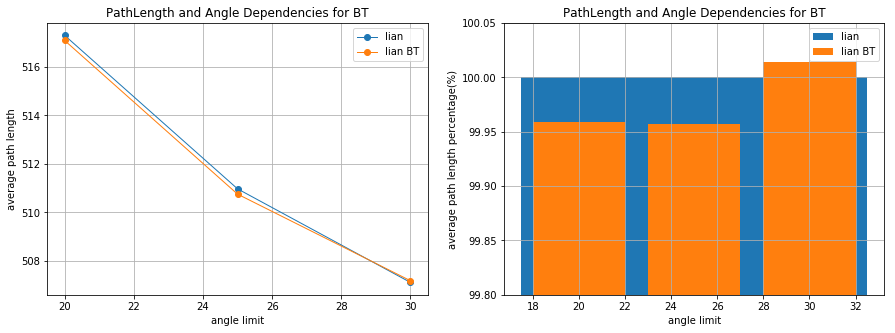

In [6]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

lbt_len = length['Moscow Maps 2.0 '].loc[length['Search'].str.contains('2017-11-27', case=False)].tolist()
l_len = length['Moscow Maps 2.0 '].loc[length['Search'].str.contains('2017-11-22', case=False)].tolist()
angles = [20, 25, 30]

plbt_len = np.array(lbt_len) * 100 / np.array(l_len)
pl_len = np.ones(len(l_len)) * 100

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(angles, l_len, marker='o', linewidth=1, label='lian')
plt.plot(angles, lbt_len, marker='o', linewidth=1, label='lian BT')
plt.title('PathLength and Angle Dependencies for BT')
plt.xlabel('angle limit')
plt.ylabel('average path length')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.bar(angles, pl_len, width=5, label='lian')
plt.bar(angles , plbt_len, width=4, label='lian BT')
plt.ylim(99.8, 100.05)
plt.title('PathLength and Angle Dependencies for BT')
plt.xlabel('angle limit')
plt.ylabel('average path length percentage(%)')
plt.legend()
plt.grid()

plt.show()

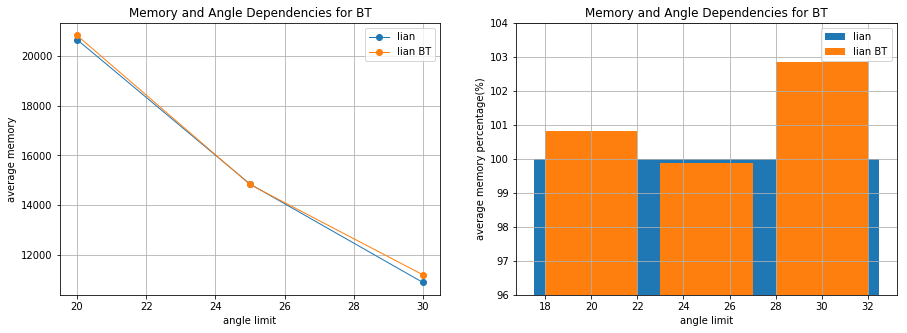

In [7]:
lbt_mem = memory['Moscow Maps 2.0 '].loc[memory['Search'].str.contains('2017-11-27', case=False)].tolist()
l_mem = memory['Moscow Maps 2.0 '].loc[memory['Search'].str.contains('2017-11-22', case=False)].tolist()
angles = [20, 25, 30]

plbt_mem = np.array(lbt_mem) * 100 / np.array(l_mem)
pl_mem = np.ones(len(l_mem)) * 100

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(angles, l_mem, marker='o', linewidth=1, label='lian')
plt.plot(angles, lbt_mem, marker='o', linewidth=1, label='lian BT')
plt.title('Memory and Angle Dependencies for BT')
plt.xlabel('angle limit')
plt.ylabel('average memory')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.bar(angles, pl_mem, width=5, label='lian')
plt.bar(angles , plbt_mem, width=4, label='lian BT')
plt.ylim(96, 104)
plt.title('Memory and Angle Dependencies for BT')
plt.xlabel('angle limit')
plt.ylabel('average memory percentage(%)')
plt.legend()
plt.grid()

plt.show()

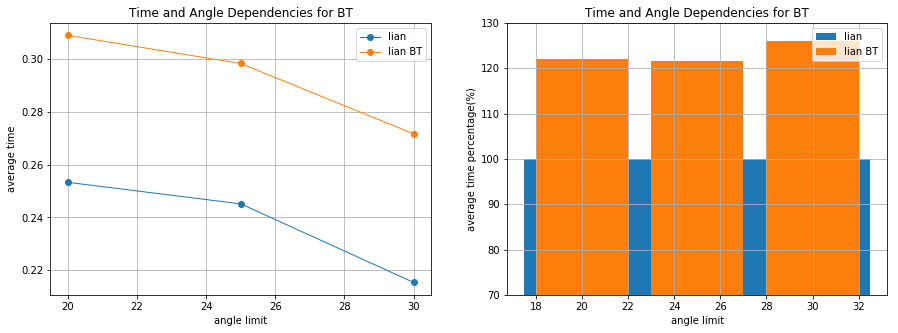

In [8]:
lbt_time = time['Moscow Maps 2.0 '].loc[time['Search'].str.contains('2017-11-27', case=False)].tolist()
l_time = time['Moscow Maps 2.0 '].loc[time['Search'].str.contains('2017-11-22', case=False)].tolist()
angles = [20, 25, 30]

plbt_time = np.array(lbt_time) * 100 / np.array(l_time)
pl_time = np.ones(len(l_time)) * 100

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(angles, l_time, marker='o', linewidth=1, label='lian')
plt.plot(angles, lbt_time, marker='o', linewidth=1, label='lian BT')
plt.title('Time and Angle Dependencies for BT')
plt.xlabel('angle limit')
plt.ylabel('average time')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.bar(angles, pl_time, width=5, label='lian')
plt.bar(angles , plbt_time, width=4, label='lian BT')
plt.ylim(70, 130)
plt.title('Time and Angle Dependencies for BT')
plt.xlabel('angle limit')
plt.ylabel('average time percentage(%)')
plt.legend()
plt.grid()

plt.show()